In [9]:
import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

#For run out of google colab
import matplotlib.pyplot as plt
def cv2_imshow(image):
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$


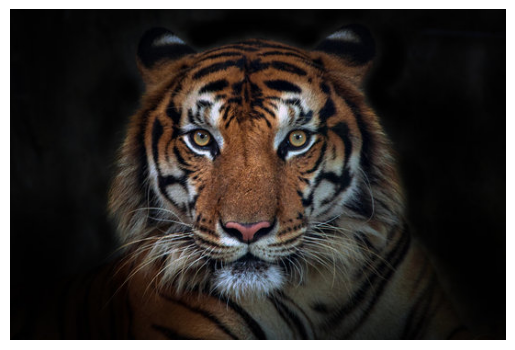

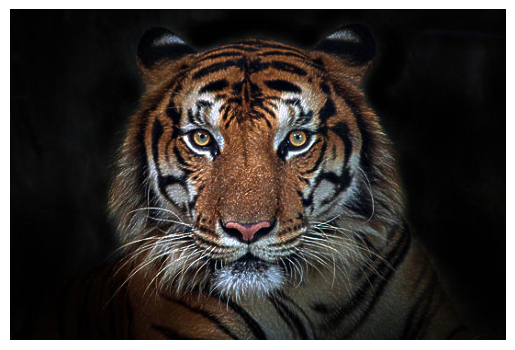

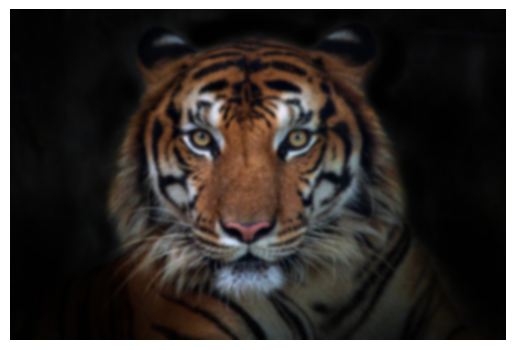

In [10]:

def sharpen_image(image,kernel_size=(7,7),gamma=2):
  #Apply a smoothing filter
  blur=cv2.GaussianBlur(image,kernel_size,0)
  #Calculate the difference between the original and blurred image
  dif=cv2.subtract(image,blur)
  #Add the sharpened detail back to the original image
  sharpened=cv2.addWeighted(image,1,dif,gamma,0)
  #Return the sharp image and the blur one
  return sharpened,blur

#Read image and show results
image=cv2.imread('tiger.jpg')
if image is not None:
  sharpened_img,blur=sharpen_image(image)
  cv2_imshow(image)
  cv2_imshow(sharpened_img)
  cv2_imshow(blur)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
else:
  print("Error: Could not load image.")

# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


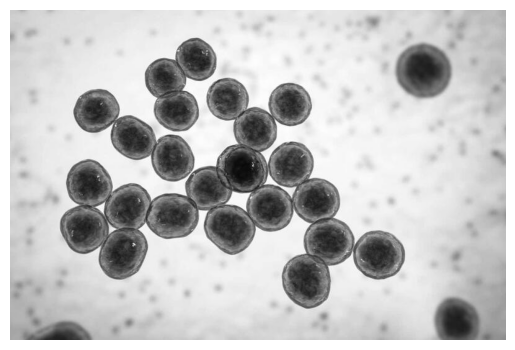

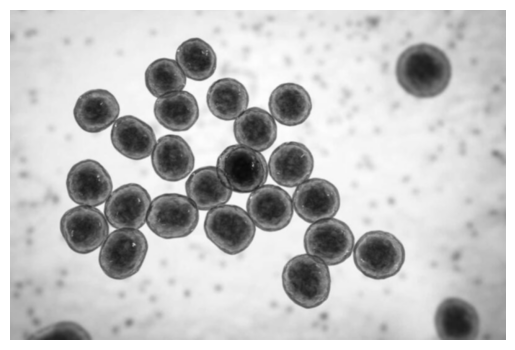

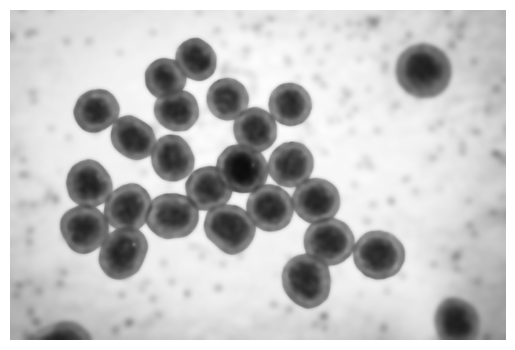

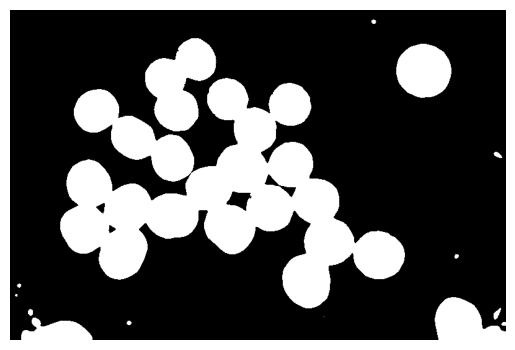

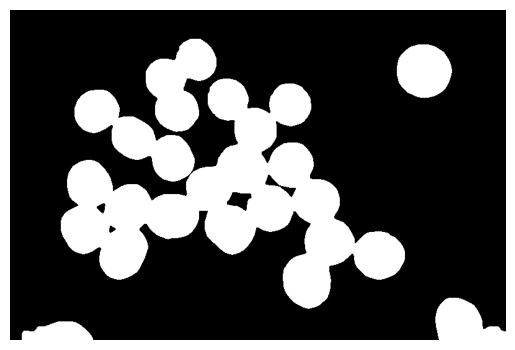

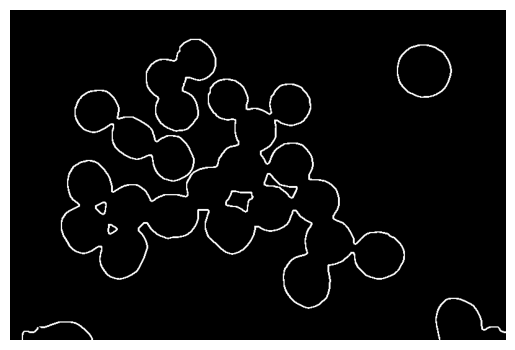

In [11]:
#Load image (grayscale)
img=cv2.imread("bacteria.jpg",cv2.IMREAD_GRAYSCALE)

#Add two filter for better results
gaussian=cv2.GaussianBlur(img,(3,3),1)
bilateral=cv2.bilateralFilter(gaussian,10,75,75)

#Convert to binary with black background
_,binary=cv2.threshold(bilateral,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary=cv2.bitwise_not(binary)

#Ellipse kernel for clean image with erode and dilate
kernel_size=14
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
eroded=cv2.erode(binary,kernel,iterations=1)
dilated=cv2.dilate(eroded,kernel,iterations=1)

#Ellipse kernel for second erode and extract edges
kernel_size=6
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
eroded2=cv2.erode(binary,kernel,iterations=1)
edges=cv2.subtract(dilated,eroded2)

#Show results
cv2_imshow(img)
cv2_imshow(gaussian)
cv2_imshow(bilateral)
cv2_imshow(binary)
cv2_imshow(dilated)
cv2_imshow(edges)

# Count bacteria



> Add blockquote



bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

Number of cells: 26


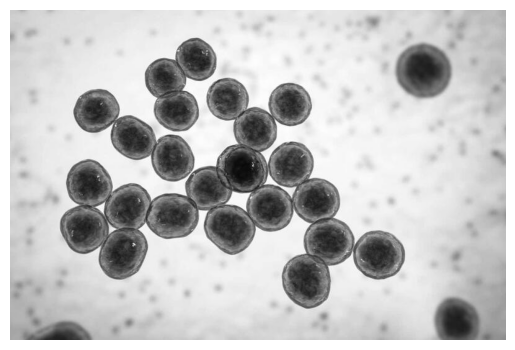

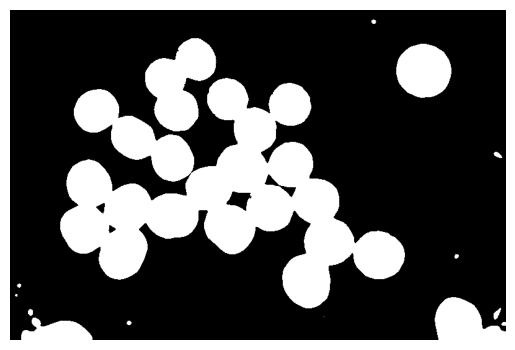

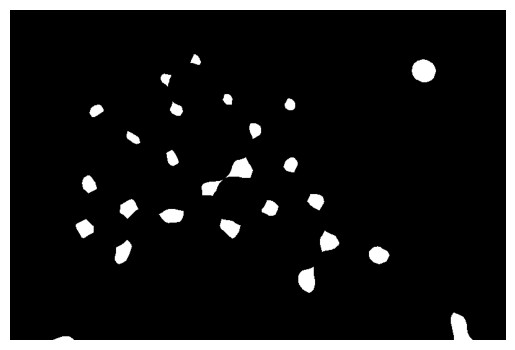

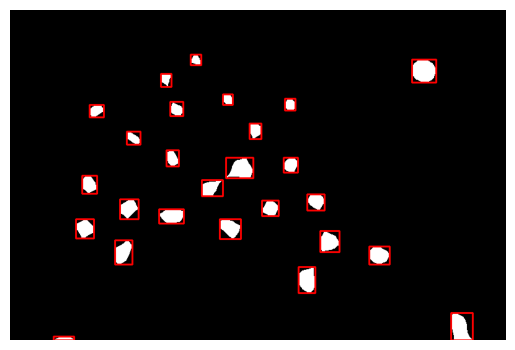

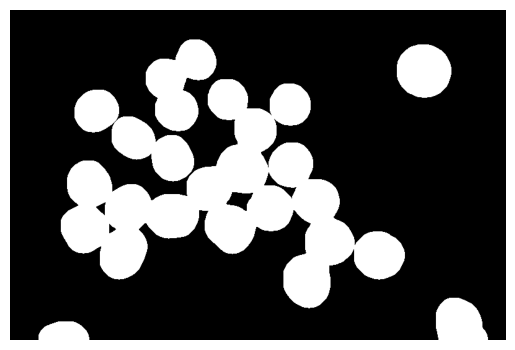

In [12]:
#Load image (grayscale)
img=cv2.imread("bacteria.jpg",cv2.IMREAD_GRAYSCALE)

#Add two filter for better results
gaussian=cv2.GaussianBlur(img,(3,3),1)
bilateral=cv2.bilateralFilter(gaussian,10,75,75)

#Convert to binary with black background
_,binary=cv2.threshold(bilateral,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary=cv2.bitwise_not(binary)

#Ellipse kernel for disconnect cells with erode
kernel_size=50
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
disconnected=cv2.erode(binary,kernel,iterations=1)

#Reconstruct connected cells
reconstructed=cv2.dilate(disconnected,kernel,iterations=1)

#Count cells
contours,_=cv2.findContours(disconnected,cv2.RETR_LIST ,cv2.CHAIN_APPROX_SIMPLE)

#Add boxes to disconnected image
boxes=cv2.cvtColor(disconnected,cv2.COLOR_GRAY2BGR)
for c in contours:
  x,y,w,h=cv2.boundingRect(c)
  cv2.rectangle(boxes,(x,y),(x+w,y+h),(0,0,255),2)

#Show results
print(f"Number of cells: {len(contours)}")
cv2_imshow(img)
cv2_imshow(binary)
cv2_imshow(disconnected)
cv2_imshow(boxes)
cv2_imshow(reconstructed)

#For auto calculate kernel size:
#Based on max number: I tried based on max number of contours but I didn't get good results.
#Based on cell sizes: It's not possible to know the average or largest cell size because the cells are not separate.
#Based on overlaps: I didn't understand exactly what you meant.



# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge